# ENGR 421 - Homework 4 
## Non-parametric Regression

## Harun Sasmaz
### 0059900

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Importing Data

In [2]:
data_set = pd.read_csv("hw04_data_set.csv").to_numpy().astype(float)

x_train = data_set[:100, 0]
y_train = data_set[:100, 1]

x_test = data_set[100:, 0]
y_test = data_set[100:, 1]

K = max(y_train)
N = x_train.shape[0]

## Regressogram

### Learning Regressogram Parameter

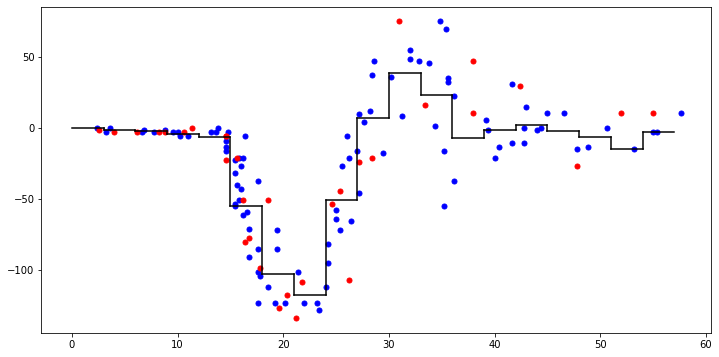

In [3]:
minimum_value = min(min(x_train), min(x_test))
maximum_value = max(max(x_train), max(x_test))
data_interval = np.linspace(minimum_value, maximum_value, 1600)

bin_width = 3
origin = 0

left_borders = np.arange(origin, maximum_value - bin_width, bin_width)
right_borders = np.arange(origin + bin_width, maximum_value, bin_width)
p_hat = np.asarray([np.sum(y_train[(left_borders[b] < x_train) & (x_train <= right_borders[b])]) / np.sum((left_borders[b] < x_train) & (x_train <= right_borders[b])) for b in range(len(left_borders))])

plt.figure(figsize = (12, 6))
plt.plot(x_train, y_train, "b.", markersize = 10)
plt.plot(x_test, y_test, "r.", markersize = 10)

for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [p_hat[b], p_hat[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [p_hat[b], p_hat[b + 1]], "k-")

plt.show()

### Regressogram RMSE

In [4]:
rmse = 0
for i in range(len(left_borders)):
    diff = y_test[ (x_test <= right_borders[i]) & (left_borders[i] < x_test) ] - p_hat[i]
    rmse = rmse + np.sum(diff**2)

rmse = np.sqrt(rmse / len(x_test))
print("Regressogram => RMSE is %0.6f when h is %d" % (rmse, bin_width))

Regressogram => RMSE is 24.725998 when h is 3


## Running Mean Smoother

### Learning Running Mean Smoother Parameter

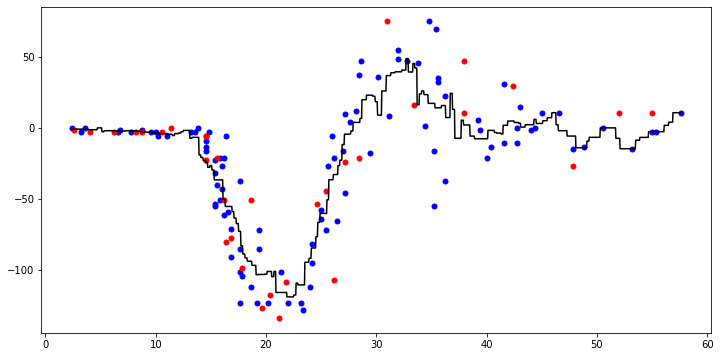

In [5]:
bin_width = 3
    
g_hat = np.asarray([np.mean(y_train[((x - 0.5 * bin_width) < x_train) & (x_train <= (x + 0.5 * bin_width))]) for x in data_interval])

plt.figure(figsize = (12, 6))
plt.plot(x_train, y_train, "b.", markersize = 10)
plt.plot(x_test, y_test, "r.", markersize = 10)
plt.plot(data_interval, g_hat, "k-", markersize=10)
plt.show()

### Running Mean Smoother RMSE

In [6]:
rmse_2 = 0

for i in range(len(y_test)):
    diff_2 = y_test[i] - g_hat[math.floor(((x_test[i] - minimum_value) / (maximum_value - minimum_value))*1600)]
    rmse_2 = rmse_2 + diff_2**2

rmse_2 = np.sqrt(rmse_2 / len(x_test))
print("Running mean smoother => RMSE is %0.6f when h is %d" % (rmse_2, bin_width))

Running mean smoother => RMSE is 23.840323 when h is 3


## Kernel Smoother

### Learning Kernel Smoother Parameter

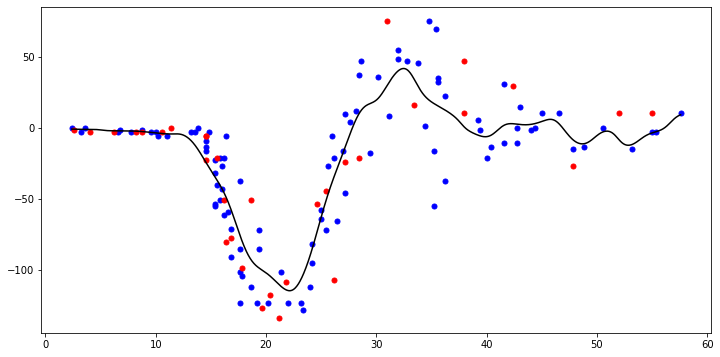

In [7]:
bin_width = 1

k_hat = np.asarray([np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2) * y_train) / np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2)) for x in data_interval])

plt.figure(figsize = (12, 6))
plt.plot(x_train, y_train, "b.", markersize = 10)
plt.plot(x_test, y_test, "r.", markersize = 10)
plt.plot(data_interval, k_hat, "k-", markersize=10)
plt.show()

### Kernel Smoother RMSE

In [8]:
rmse_3 = 0

for i in range(len(y_test)):
    diff_3 = y_test[i] - k_hat[math.floor(((x_test[i] - minimum_value) / (maximum_value - minimum_value))*1600)]
    rmse_3 = rmse_3 + diff_3**2

rmse_3 = np.sqrt(rmse_3 / len(x_test))
print("Kernel Smoother => RMSE is %0.6f when h is %d" % (rmse_3, bin_width))

Kernel Smoother => RMSE is 24.154498 when h is 1
